In [1]:
import h5py
import numpy as np

In [2]:
h5 = h5py.File('sim_12345_traj.h5', 'r')

In [3]:
t0 = [x for x in h5['/particles/atoms/species/value'][0] if x != -1]
t1 = [x for x in h5['/particles/atoms/species/value'][1] if x != -1]

In [4]:
tn = ['M1', 'M2', 'MA', 'MB', 'P1', 'P2', 'PA', 'PB', 'RA', 'RB']

In [5]:
vtn = {'M1': 'P1', 'M2': 'P2', 'MA': 'PA', 'MB': 'PB', 'MB': 'RB', 'MA': 'RA', 'PB': 'RB', 'PA': 'RA'}

In [6]:
import networkx as nx

In [7]:
h5['/connectivity'].keys()

[u'bonds', u'chem_bonds_0']

In [8]:
b_static = h5['/connectivity/bonds']
cl = h5['/connectivity/chem_bonds_0/value']

In [9]:
cg_beads = {
    x: range(x*6+1, x*6+6+1)
    for x in range(1000)
}
at_cg_bead = {
    a: k for k, v in cg_beads.items() for a in v
}

print cg_beads[0]
print cg_beads[1]
print cg_beads[579]

at_types = h5['/particles/atoms/species/value'][-1]
at_types0 = h5['/particles/atoms/species/value'][0]
connected_cg = set()
for b1, b2 in cl[-1][:6]:
    if b1 != -1 and b2 != -1:
        cg1, cg2 = map(at_cg_bead.get, (b1, b2))
        connected_cg.add(tuple(sorted((cg1, cg2))))
        t1 = tn[at_types[b1-1]]
        t2 = tn[at_types[b2-1]]
        t01 = tn[at_types0[b1-1]]
        t02 = tn[at_types0[b2-1]]
        print t01, t1, t02, t2

ac_nodes = set()
ac_nodes.update(range(1, 13))
for cg1, cg2 in connected_cg:
    t1 = [tn[at_types[i-1]] for i in cg_beads[cg1]]
    t01 = [tn[at_types0[i-1]] for i in cg_beads[cg1]]
    t2 = [tn[at_types[i-1]] for i in cg_beads[cg2]]
    t02 = [tn[at_types0[i-1]] for i in cg_beads[cg2]]
    ac_nodes.update(cg_beads[cg1])
    ac_nodes.update(cg_beads[cg2])
    print cg1, cg2
    print t1, cg_beads[cg1], t01
    print t2, cg_beads[cg2], t02
    print '-'*10

[1, 2, 3, 4, 5, 6]
[7, 8, 9, 10, 11, 12]
[3475, 3476, 3477, 3478, 3479, 3480]
MA RA MB RB
MA RA MB RB
MA RA MB RB
MA RA MB RB
MA RA MB RB
MA RA MB RB
154 820
['RA', 'P1', 'P2', 'P2', 'PB', 'PB'] [925, 926, 927, 928, 929, 930] ['MA', 'M1', 'M2', 'M2', 'MB', 'MB']
['PA', 'P1', 'P2', 'P2', 'RB', 'PB'] [4921, 4922, 4923, 4924, 4925, 4926] ['MA', 'M1', 'M2', 'M2', 'MB', 'MB']
----------
52 853
['RA', 'P1', 'P2', 'P2', 'PB', 'PB'] [313, 314, 315, 316, 317, 318] ['MA', 'M1', 'M2', 'M2', 'MB', 'MB']
['PA', 'P1', 'P2', 'P2', 'PB', 'RB'] [5119, 5120, 5121, 5122, 5123, 5124] ['MA', 'M1', 'M2', 'M2', 'MB', 'MB']
----------
827 900
['PA', 'P1', 'P2', 'P2', 'PB', 'RB'] [4963, 4964, 4965, 4966, 4967, 4968] ['MA', 'M1', 'M2', 'M2', 'MB', 'MB']
['RA', 'P1', 'P2', 'P2', 'PB', 'PB'] [5401, 5402, 5403, 5404, 5405, 5406] ['MA', 'M1', 'M2', 'M2', 'MB', 'MB']
----------
785 825
['PA', 'P1', 'P2', 'P2', 'PB', 'RB'] [4711, 4712, 4713, 4714, 4715, 4716] ['MA', 'M1', 'M2', 'M2', 'MB', 'MB']
['RA', 'P1', 'P2', 'P

In [20]:
g0 = nx.Graph()
node_labels = {i+1: x for i, x in enumerate(h5['/particles/atoms/species/value'][-1]) if x != -1 and i+1 in ac_nodes}
for b1, b2 in b_static:
    if b1 != -1 and b2 != -1 and b1 in ac_nodes and b2 in ac_nodes:
        g0.add_edge(b1, b2)

In [21]:
g0.add_nodes_from(ac_nodes)

In [29]:
node_colors = ['r' if node_labels[i] < 4 else 'b' for i in g0.nodes()]

In [30]:
for b1, b2 in cl[-1][:6]:
    if b1 != -1 and b2 != -1 and b1 in ac_nodes and b2 in ac_nodes:
        g0.add_edge(b1, b2)

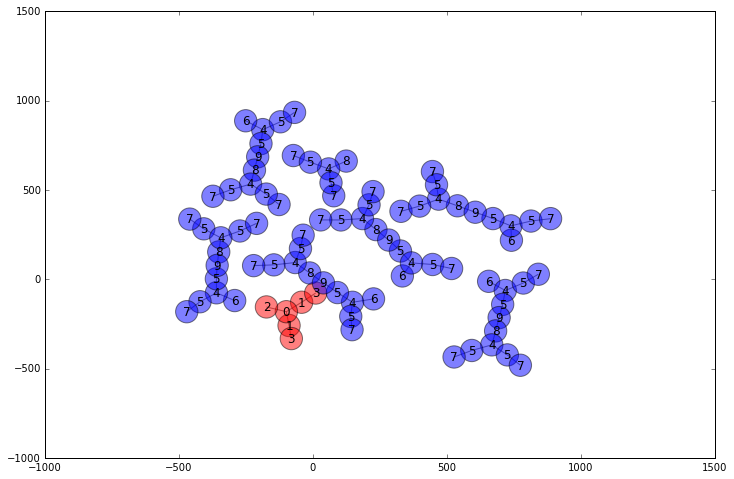

In [31]:
from networkx.drawing.nx_agraph import graphviz_layout
pos = graphviz_layout(g0)
nx.draw_networkx(g0, pos, node_color=node_colors, labels=node_labels, alpha=0.5, node_size=500)

In [40]:
cg_connections = set()
cg_activated = set()
for b1, b2 in cl[-1]:
    if b1 != -1 and b2 != -1:
        cg1, cg2 = map(at_cg_bead.get, (b1, b2))
        cg_connections.add(tuple(sorted((cg1, cg2))))
        cg_activated.add(cg1)
        cg_activated.add(cg2)
g1 = nx.Graph()

In [41]:
g1.add_nodes_from(cg_activated)
g1.add_edges_from(cg_connections)

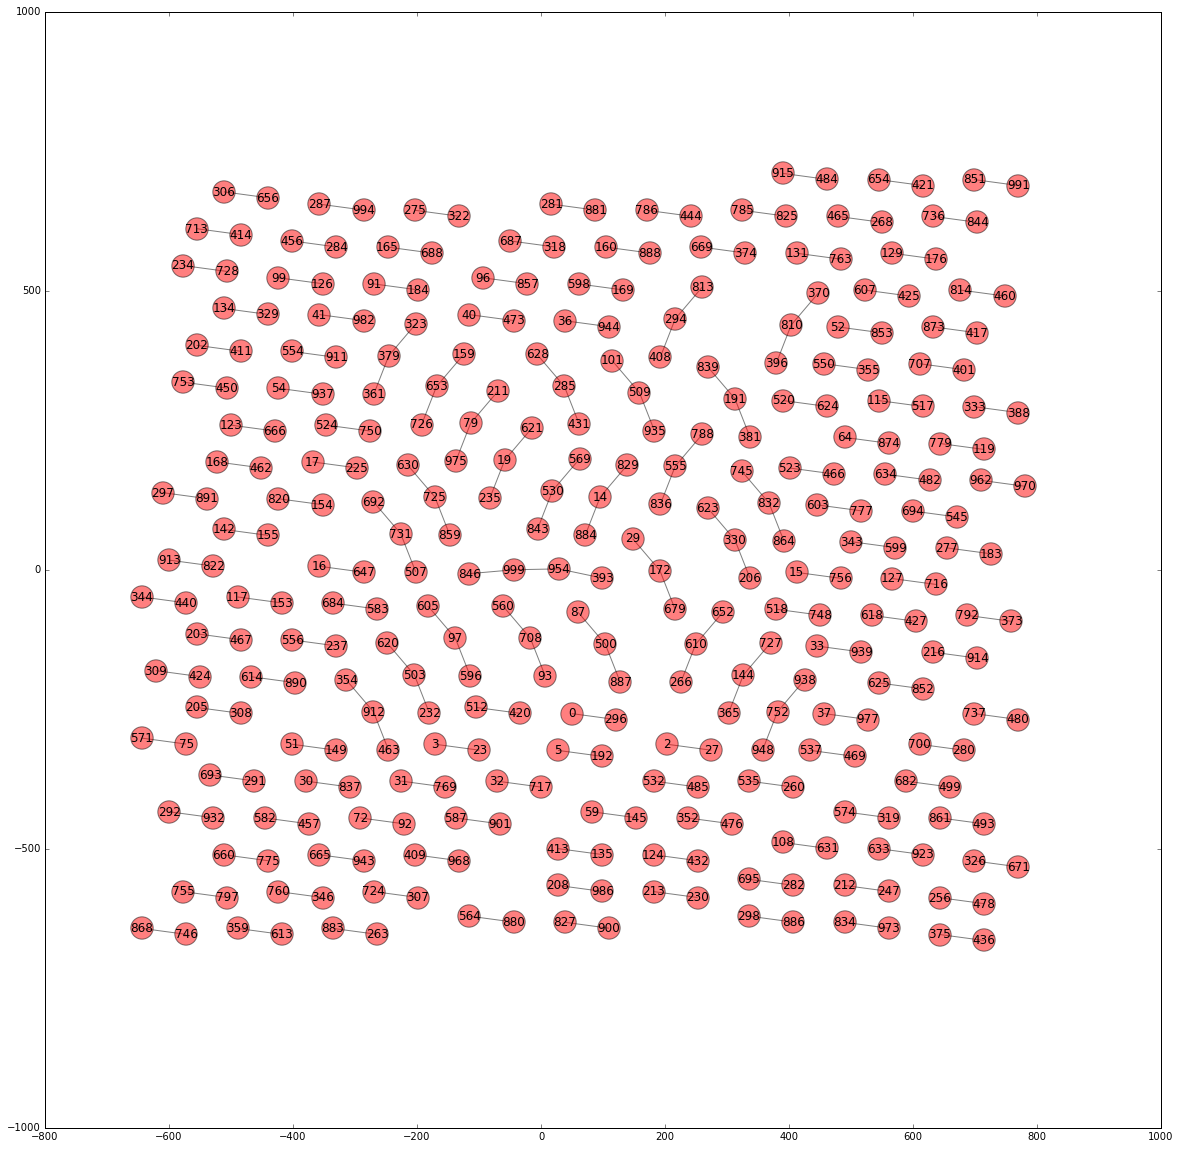

In [42]:
from networkx.drawing.nx_agraph import graphviz_layout
pos = graphviz_layout(g1)
plt.rcParams['figure.figsize'] = (20, 20)
nx.draw_networkx(g1, pos, alpha=0.5, node_size=500)